In [66]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-66-6100ab58204d>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Gradient descent in 1D

manual application using hardcode and numpy

In [67]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

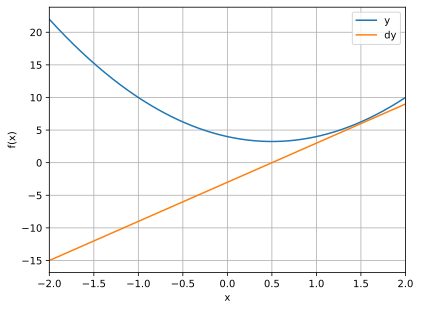

In [68]:
#plot the function and its derivative
#define a range for x

x=np.linspace(-2,2,2001)

#plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [69]:
#random starting point
localmin = np.random.choice(x, 1)
print(localmin)   # this is the first estimate localmin
#learning parameters
learning_rate = .01
training_epochs = 100

# run through training
# below is the code that implements the gradient descent algorithm
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin = learning_rate*grad

localmin

[-0.338]


array([-0.03191489])

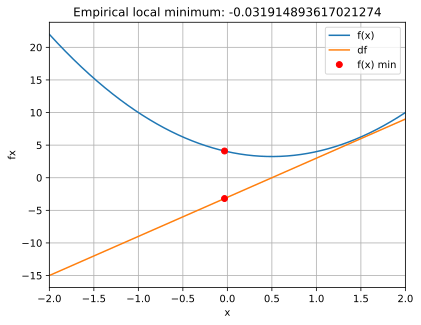

In [70]:
#plot the results

plt.plot(x,fx(x), x, deriv(x))
plt.plot(localmin,deriv(localmin), 'ro')
plt.plot(localmin,fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('fx')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

Store the model parameters and outputs on each iteration

In [71]:
#random starting point
localmin = np.random.choice(x,1)

#learning_rate=0.01
training_epochs = 100

#run through training and store all the result
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = localmin,grad

<ipython-input-71-eb0a620856d6>:12: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


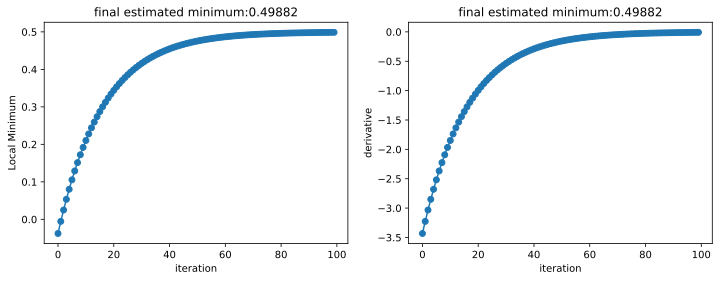

In [72]:
#plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i], 'o-')
  ax[i].set_xlabel('iteration')
  ax[i].set_title(f'final estimated minimum:{localmin[0]:.5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('derivative')

plt.show()

In [74]:
#random starting point
localmin = np.random.choice(x,1)

#learning_rate=0.01
training_epochs = 100

#run through training and store all the result
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  if grad<=0.1:
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin,grad
  else:
    continue

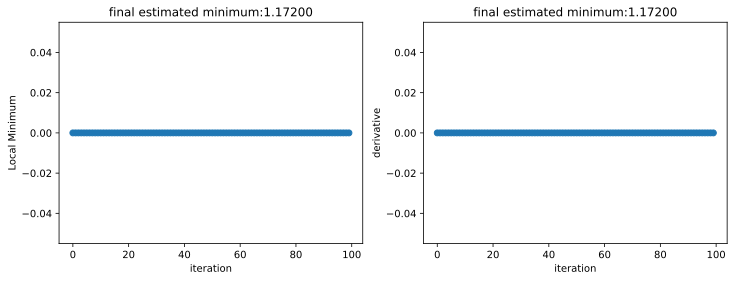

In [75]:
#plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i], 'o-')
  ax[i].set_xlabel('iteration')
  ax[i].set_title(f'final estimated minimum:{localmin[0]:.5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('derivative')

plt.show()

Example2


In [82]:
#function (as a function)
def fx(x):
  return np.cos(2*np.pi*x) + x ** 2
#derivative function
def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x) + 2*x

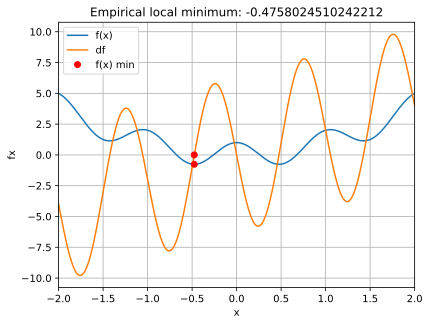

In [83]:
#plot the function and its derivative

#define a range for x
x = np.linspace(-2,2,2001)

plt.plot(x,fx(x), x, deriv(x))
plt.plot(localmin,deriv(localmin), 'ro')
plt.plot(localmin,fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('fx')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

In [84]:
#random starting point
localmin = np.random.choice(x,1)
#localmin = np.array([0])  # this will cause a vanishing gradient because when local min is 0 then the derivative is 0and everthing else will go to 0
#learning_rate=0.01
training_epochs = 1000

#run through training and store all the result
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = localmin,grad

<ipython-input-84-db704a5e1175>:12: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


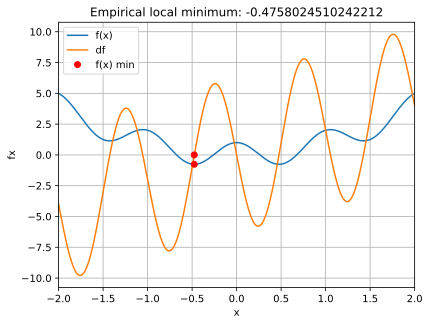

In [79]:
#plot the function and its derivative

#define a range for x
x = np.linspace(-2,2,2001)

plt.plot(x,fx(x), x, deriv(x))
plt.plot(localmin,deriv(localmin), 'ro')
plt.plot(localmin,fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('fx')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

The partial derivatives of 2D function using sympy and lambdify

In [80]:
#Import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym    #sympy to compute the partial derivatives

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-80-ab26f4f908fd>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Gradient descent in 2D


In [81]:
#the "peaks" function
def peaks(x,y):
  #expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  #expand to a 2Dmesh
  x,y = np.meshgrid(x,y)

  z = 3 *(1-x)**2 * np.exp(-(x**2) - (y+1)**2)  \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

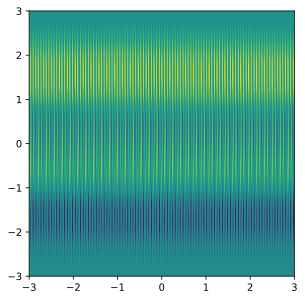

In [62]:
#create the landscape
x = np.linspace(-3,3,101)
y = np.linspace(-3,3,101)

Z = peaks(x,y)

#lets have a look!
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5,vmax=5,origin='lower')
plt.show()


In [63]:
from sympy.core.symbol import symbols
#create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')


sZ = 3 *(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2)  \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [64]:
#random starting point (uniform between -2 and +2)
#localmin = np.random.rand(2)*4-2 #also try specifying coordinates
localmin = [0,1.4]
startpnt = localmin[:] #make a copy, not re-assign

#learning parameters
learning_rate = .1
training_epochs = 1000

#run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([df_x(localmin[0],localmin[1]).evalf(),
                   df_y(localmin[0],localmin[1]).evalf()
                   ])
  localmin = localmin - learning_rate*grad #add _or [:] to change a variable in-place
  trajectory[i,:] = localmin

print(localmin)
print(startpnt)

[0.296445553846832 0.320196247666834]
[0, 1.4]


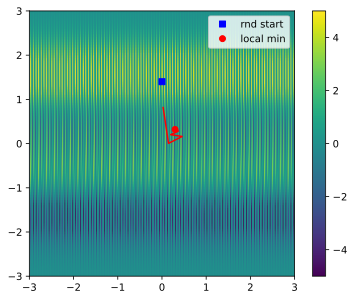

In [65]:
#let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start',"local min"])
plt.colorbar()
plt.show()
